# Generate a Audit Trail test file
## Define program variable

In [1]:
#Define User Variable
import pandas as pd


atStartDate = '01.05.2020 6:00:00'
atEndDate = '01.05.2020 15:00:00' # alternativ könnte hier +8h stehen
maxAtEntries = 10


dataBaseEntries = {
    'UserDefault': pd.DataFrame( columns = ['User ID', 'Probability'] ),
    'User': pd.DataFrame( columns = ['User ID', 'Probability'] ),
    'Description': pd.DataFrame( columns = ['User ID', 'Description', 'Probability'] ),
    'Comments':  pd.DataFrame( columns = ['User ID', 'Description', 'Comment', 'Probability'] )    
}


dataBase = pd.DataFrame(columns = ['Timestamp', 'User ID', 'Object ID', 'Description', 'Comments'])
userDB = pd.DataFrame( columns = ['User ID', 'Probablility'] )

#descriptionDB = pd.DataFrame(  columns = ['Description', 'Probablility'] )

#dataBaseEntries['UserDefault']['User ID'] = ['Admin', 'System']
#dataBaseEntries['UserDefault']['Probablility'] = [0.2, 0.1]
userDB['User ID'] = ['Admin', 'System']
userDB['Probablility'] = [0.2, 0.1]

#userDB.set_index(['User ID'], inplace = True)


## Define default users

In [2]:
#Define default users
entries = {
    'Admin': 0.2,
    'System': 0.1,
    'User': 0.7
}


dataBaseEntries['UserDefault']['User ID'] = entries.keys()
dataBaseEntries['UserDefault']['Probability'] = entries.values()



userDB['User ID'] = ['Admin', 'System']
userDB['Probablility'] = [0.2, 0.1]

#userDB.set_index(['User ID'], inplace = True)

userDB
dataBaseEntries['UserDefault']

,User ID,Probability
0,Admin,0.2
1,System,0.1
2,User,0.7


In [3]:
#userDB.loc['Admin']

#userDB.loc[lambda userDB: userDB['User ID'] == 'Admin', :]
#db = dataBaseEntries['UserDefault']
#db.loc[ lambda db: db['User ID'] == 'template', :]


## Define real user

In [4]:
import math
#Define Users
entriesUser = [
    'pharma/de01234',
    'pharma/I047874',
    'pharma/I984321'
]

userDb = dataBaseEntries['User']
userDefaultDb = dataBaseEntries['UserDefault']

if userDb.empty:
    
    user = userDefaultDb.loc[ lambda userDefaultDb: userDefaultDb['User ID'] == 'User', :]
    
    if not user.empty:
        size = len(entriesUser)
        value = user['Probability'].values[0]/size
            
        userDb['User ID'] = entriesUser
        userDb['Probability'] = [value]*(size)#equal porp for all users

# Add System Users
dataBaseEntries['User'] = pd.concat( [userDb, userDefaultDb.loc[ lambda userDefaultDb: userDefaultDb['User ID'] != 'User', :]], ignore_index = True )





userEx = pd.DataFrame( columns = ['User ID', 'Probablility'] )

userEx['User ID'] = ['pharma/de01234'] #, 'pharma/I047874', 'pharma/I047874', 'pharma/I984321'


#Define probablility

#equal probability
val = (1 - userDB[ userDB.columns[1] ].sum()) / userEx.shape[0]
userEx['Probablility'] = [val] * userEx.shape[0]
#userDB = userDB.append( {'User ID': user, 'Probablility': prop }, ignore_index=True )

userDB = pd.concat([userDB, userEx], ignore_index = True)

dataBaseEntries['User']

,User ID,Probability
0,pharma/de01234,0.233333
1,pharma/I047874,0.233333
2,pharma/I984321,0.233333
3,Admin,0.200000
4,System,0.100000


## Define Descriptions and propablifor each user 

In [5]:
adminDescriptions = {
    'Wechsel in die Betriebsart Online' : 0.2,
    'Wechsel in die Betriebsart Offline' : 0.2,
    'Anwendung wird gestartet' : 0.2,
    'Anwendung wird beendet' : 0.4
}

systemDescriptions = {
    'Benutzer # wurde hinzugefügt' : 0.1,
    'Benutzer # wurde entfernt' : 0.1,
    'Benutzer # ist keiner Gruppe zugeordnet' : 0.4,
    'Benutzer # ist einer neuen Gruppe zugeordnet' : 0.4,
}

userDescriptions = {
    'Umfang # wurde geändert' : 0.1,
    'Schwellwert wurde geändert' : 0.1,
    'Wert wurde gelöscht' : 0.4,
    'Hambeuldu' : 0.4    
} 

userList = ['Admin'] * len(adminDescriptions)
descriptionList = list(adminDescriptions.keys())
propList = list(adminDescriptions.values())

userList.extend(['System'] * len(systemDescriptions))
descriptionList.extend(list(systemDescriptions.keys()))
propList.extend(list(systemDescriptions.values()))

userList.extend(['User'] * len(userDescriptions))
descriptionList.extend(list(userDescriptions.keys()))
propList.extend(list(userDescriptions.values()))


dataBaseEntries['Description']['User ID'] = userList
dataBaseEntries['Description']['Description'] = descriptionList
dataBaseEntries['Description']['Probability'] = propList








userIDs = userDB['User ID'].to_list()
#bring the description dict into the userDB as well
#system and user extension separat

descriptions = {
    (userIDs[0], 'Wechsel in die Betriebsart Online') : 0.2,
    (userIDs[0], 'Wechsel in die Betriebsart Offline') : 0.2,
    (userIDs[0], 'Anwendung wird gestartet') : 0.2,
    (userIDs[0], 'Anwendung wird beendet') : 0.4,
    
    (userIDs[1], 'Benutzer # wurde hinzugefügt') : 0.1,
    (userIDs[1], 'Benutzer # wurde entfernt') : 0.1,
    (userIDs[1], 'Benutzer # ist keiner Gruppe zugeordnet') : 0.4,
    (userIDs[1], 'Benutzer # ist einer neuen Gruppe zugeordnet') : 0.4,
              
    (userIDs[2], 'Umfang # wurde geändert') : 0.1,
    (userIDs[2], 'Schwellwert wurde geändert') : 0.1,
    (userIDs[2], 'Wert wurde gelöscht') : 0.4,
    (userIDs[2], 'Hambeuldu') : 0.4
}
descriptionDB = pd.DataFrame(pd.Series(descriptions), columns = ['Probablility'])
descriptionDB.index.names = ['User ID', 'Descriptions']

#descriptionDB.to_excel('out.xlsx')
#descriptionDB.loc['Admin']
dataBaseEntries['Description']

,User ID,Description,Probability
0,Admin,Wechsel in die Betriebsart Online,0.2
1,Admin,Wechsel in die Betriebsart Offline,0.2
2,Admin,Anwendung wird gestartet,0.2
3,Admin,Anwendung wird beendet,0.4
4,System,Benutzer # wurde hinzugefügt,0.1
5,System,Benutzer # wurde entfernt,0.1
6,System,Benutzer # ist keiner Gruppe zugeordnet,0.4
7,System,Benutzer # ist einer neuen Gruppe zugeordnet,0.4
8,User,Umfang # wurde geändert,0.1
9,User,Schwellwert wurde geändert,0.1


In [6]:
#1 getDataFrame Description
user = 'Admin'
db = dataBaseEntries['Description']

#2 get Description related to user
selection = db.loc[ lambda db: db['User ID'] == user, :]

selection['Description']

#3 get random user action
#ds = np.random.choice(descriptions[user][0], 1, p=descriptions[user][1])                          
#descriptionList.append(ds[0])# random user related description ID
    

0     Wechsel in die Betriebsart Online
1    Wechsel in die Betriebsart Offline
2              Anwendung wird gestartet
3                Anwendung wird beendet
Name: Description, dtype: object

In [7]:
#3. enhance database entries
userList = []
objectList = []
descriptionList = []
commentsList = []

In [8]:
#User login and logof entries
logIn = 'An'
logOff = 'Ab'

logEntryDic = {
    'UserId': userIDs[1], 
    'ObjectId': 'Benutzerverwaltung',
    'Description': 'meldung von Benutzer # war erfolgreich.' 
}

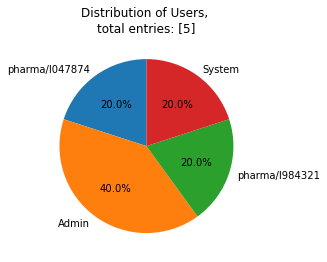

In [9]:
#Generate random values
#1. numbers of audit trail entries 
import numpy as np # import random insteed
import collections
import matplotlib.pyplot as plt



userDB = dataBaseEntries['User']

nOfAtEntries = np.random.choice(maxAtEntries, 1)
#userEntries = np.random.choice(userIDs, nOfAtEntries, p=userProp)
userEntries = np.random.choice(userDB['User ID'].to_list(), nOfAtEntries, p=userDB['Probability'].to_list())
#plot the distribution of users
plotValues = collections.Counter(userEntries)

plt.pie(list(plotValues.values()), labels=list(plotValues.keys()), startangle=90, autopct='%.1f%%' )
plt.title(f'Distribution of Users, \ntotal entries: {nOfAtEntries}')

plt.show()

In [10]:
#helping functions
import re #regex 


def logEntry(logPostFix, user):
    userList.append(logEntryDic['UserId'])
    descriptionList.append(logPostFix + re.sub('#', user, logEntryDic['Description']))
    objectList.append(logEntryDic['ObjectId'])
    
def userEntry(user):
    userList.append(user)
    #1 getDataFrame Description
    db = dataBaseEntries['Description']
    #2 get Description related to user
    
    #2.1 get user group
    sUser = user
    if sUser not in dataBaseEntries['UserDefault']['User ID'].to_list():
        sUser = 'User'
    
    print(sUser)
    
    selection = db.loc[ lambda db: db['User ID'] == sUser, :]
    #3 get random user action
    ds = np.random.choice(selection['Description'], 1, p=selection['Probability'])                          
    descriptionList.append(ds[0])# random user related description ID
    
    #4 get related object id to the description
    objectList.append('ObjectID for user ' + user )#random user related object ID
    
    #5 get related comment 


    

In [11]:
#3. enhance database entries
loggedUser = None
newUser = None


for user in userEntries:
    if 'pharma/' not in user:
        if loggedUser:
            loggedUser = None
            logEntry(logOff, user)
        userEntry(user)
    
    if 'pharma/' in user:
        newUser = user
        while newUser:
            if not loggedUser:
                loggedUser = user
                logEntry(logIn, user) 
            if loggedUser == user:
                userEntry(user)
                newUser = None
            else:
                logEntry(logOff, user)
                loggedUser = None
                newUser = user
            
if loggedUser:
    logEntry(logOff, user)
    loggedUser = None

User
Admin
User
System
Admin


In [12]:
#2. Random timestamps for each entry
entries = np.random.choice(pd.date_range(atStartDate, atEndDate, freq='S'), 
                           len(userList), 
                           replace=False)

In [13]:
dataBase['Timestamp'] = pd.to_datetime(np.sort(entries))
dataBase['User ID'] = userList
dataBase['Object ID'] = objectList
dataBase['Description'] = descriptionList

dataBase.to_csv('auditTrail.csv')
dataBase

,Timestamp,User ID,Object ID,Description,Comments
0,2020-01-05 09:19:03,System,Benutzerverwaltung,Anmeldung von Benutzer pharma/I047874 war erfo...,NaN
1,2020-01-05 09:46:31,pharma/I047874,ObjectID for user pharma/I047874,Hambeuldu,NaN
2,2020-01-05 10:15:10,System,Benutzerverwaltung,Abmeldung von Benutzer Admin war erfolgreich.,NaN
3,2020-01-05 10:42:42,Admin,ObjectID for user Admin,Wechsel in die Betriebsart Online,NaN
4,2020-01-05 11:49:11,System,Benutzerverwaltung,Anmeldung von Benutzer pharma/I984321 war erfo...,NaN
5,2020-01-05 12:46:05,pharma/I984321,ObjectID for user pharma/I984321,Hambeuldu,NaN
6,2020-01-05 12:54:28,System,Benutzerverwaltung,Abmeldung von Benutzer System war erfolgreich.,NaN
7,2020-01-05 13:37:24,System,ObjectID for user System,Benutzer # ist keiner Gruppe zugeordnet,NaN
8,2020-01-05 14:25:03,Admin,ObjectID for user Admin,Anwendung wird gestartet,NaN
